In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pm4py.objects.conversion.log import converter as log_converter 
from pm4py.objects.log.importer.xes import importer as xes_importer

from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.petri_net.util import performance_map 

from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
import pm4py

In [2]:
eventlog=pd.read_csv("predata3.csv")

In [3]:
eventlog.head()

,USN,Date,Type,Specific,Value,Vname,SV
0,1DS19CS001,2022-11-21 00:00:00,attandance,Month1,75,Month1G75,G75
1,1DS19CS002,2022-11-21 00:00:00,attandance,Month1,90,Month1G90,G90
2,1DS19CS003,2022-11-21 00:00:00,attandance,Month1,50,Month1G50,G50
3,1DS19CS004,2022-11-21 00:00:00,attandance,Month1,75,Month1G75,G75
4,1DS19CS005,2022-11-21 00:00:00,attandance,Month1,75,Month1G75,G75


In [4]:
eventlog=eventlog.drop(['Specific', 'Value'], axis=1)

In [5]:
eventlog.rename(columns={'Date': 'time:timestamp', 
'USN': 'case:concept:name', 'Vname': 'concept:name', 'Type': 'org:resource'}, inplace=True)

In [6]:
eventlog.head()

,case:concept:name,time:timestamp,org:resource,concept:name,SV
0,1DS19CS001,2022-11-21 00:00:00,attandance,Month1G75,G75
1,1DS19CS002,2022-11-21 00:00:00,attandance,Month1G90,G90
2,1DS19CS003,2022-11-21 00:00:00,attandance,Month1G50,G50
3,1DS19CS004,2022-11-21 00:00:00,attandance,Month1G75,G75
4,1DS19CS005,2022-11-21 00:00:00,attandance,Month1G75,G75


In [7]:
log = log_converter.apply(eventlog)

In [8]:
## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(log)

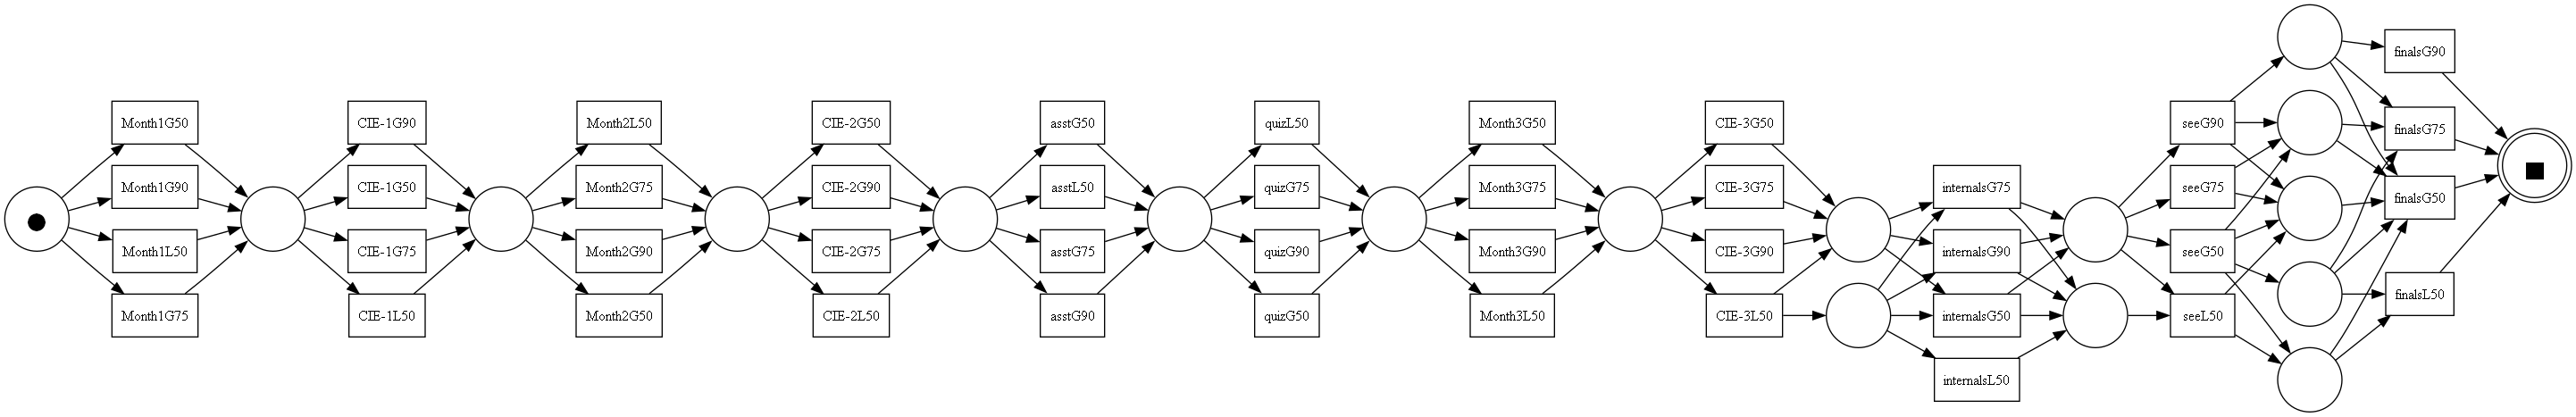

In [9]:
## Import the petrinet visualizer object
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/598 [00:00<?, ?it/s]

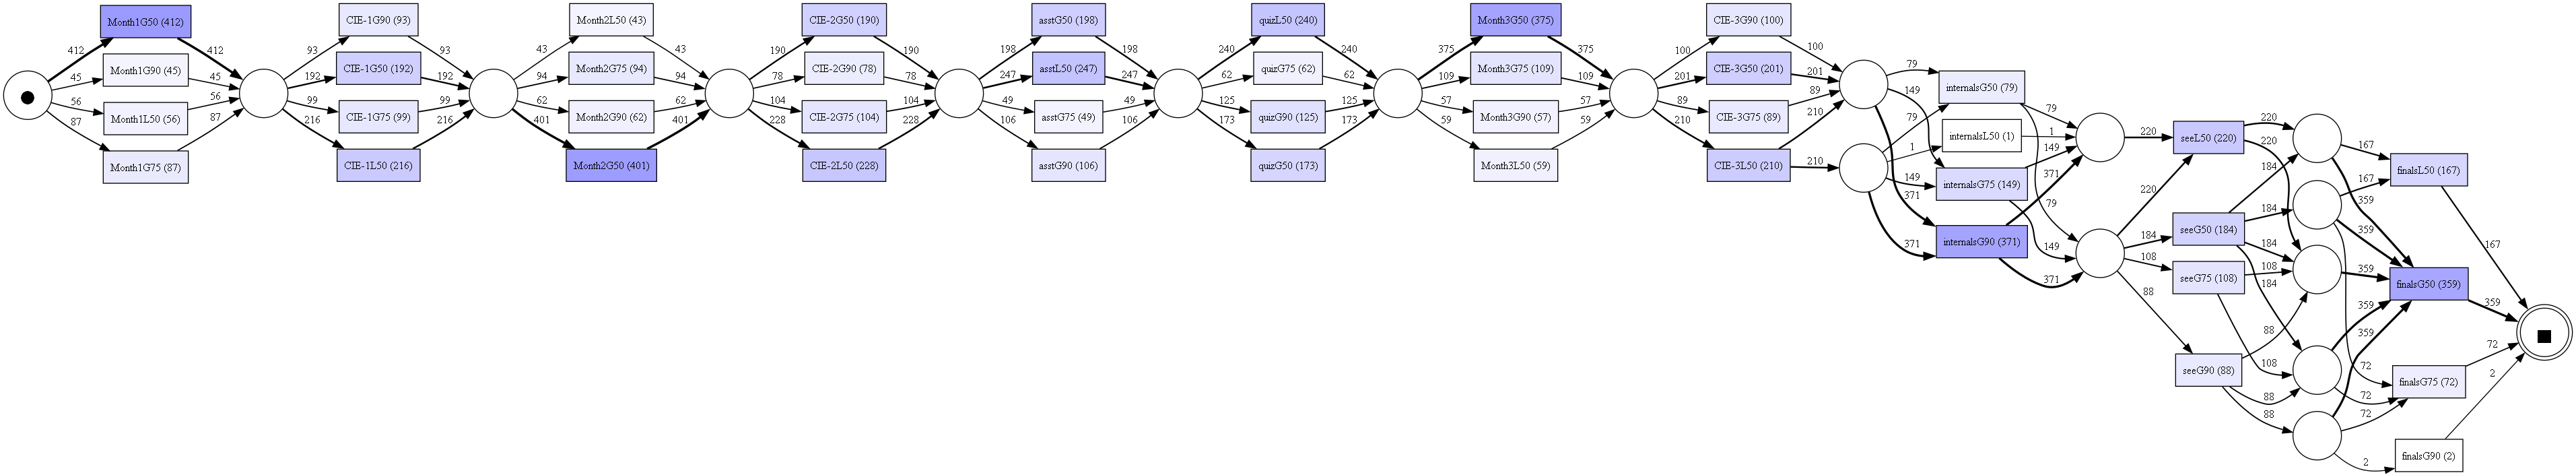

In [10]:
gviz = pn_visualizer.apply(net, initial_marking, final_marking,variant=pn_visualizer.Variants.FREQUENCY,log=eventlog)
pn_visualizer.view(gviz)

In [11]:
# heuristics miner
heu_net = heuristics_miner.apply_heu(log)

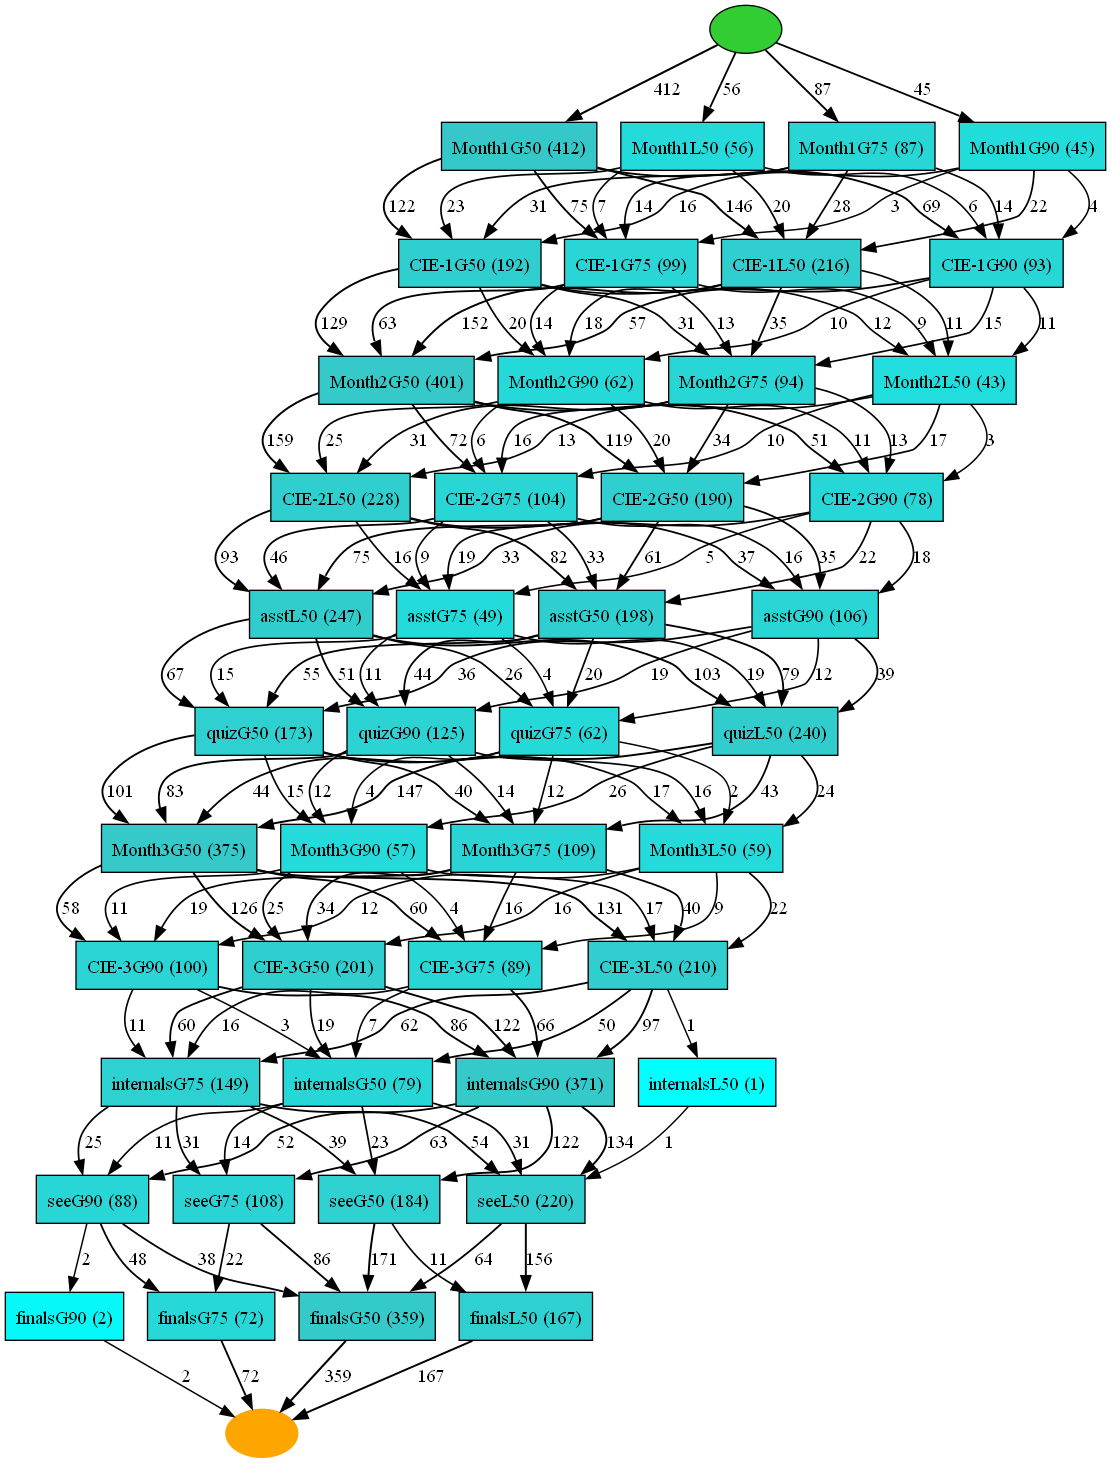

In [12]:
# Import the heuristics net visualisation object
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
# Visualise model
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

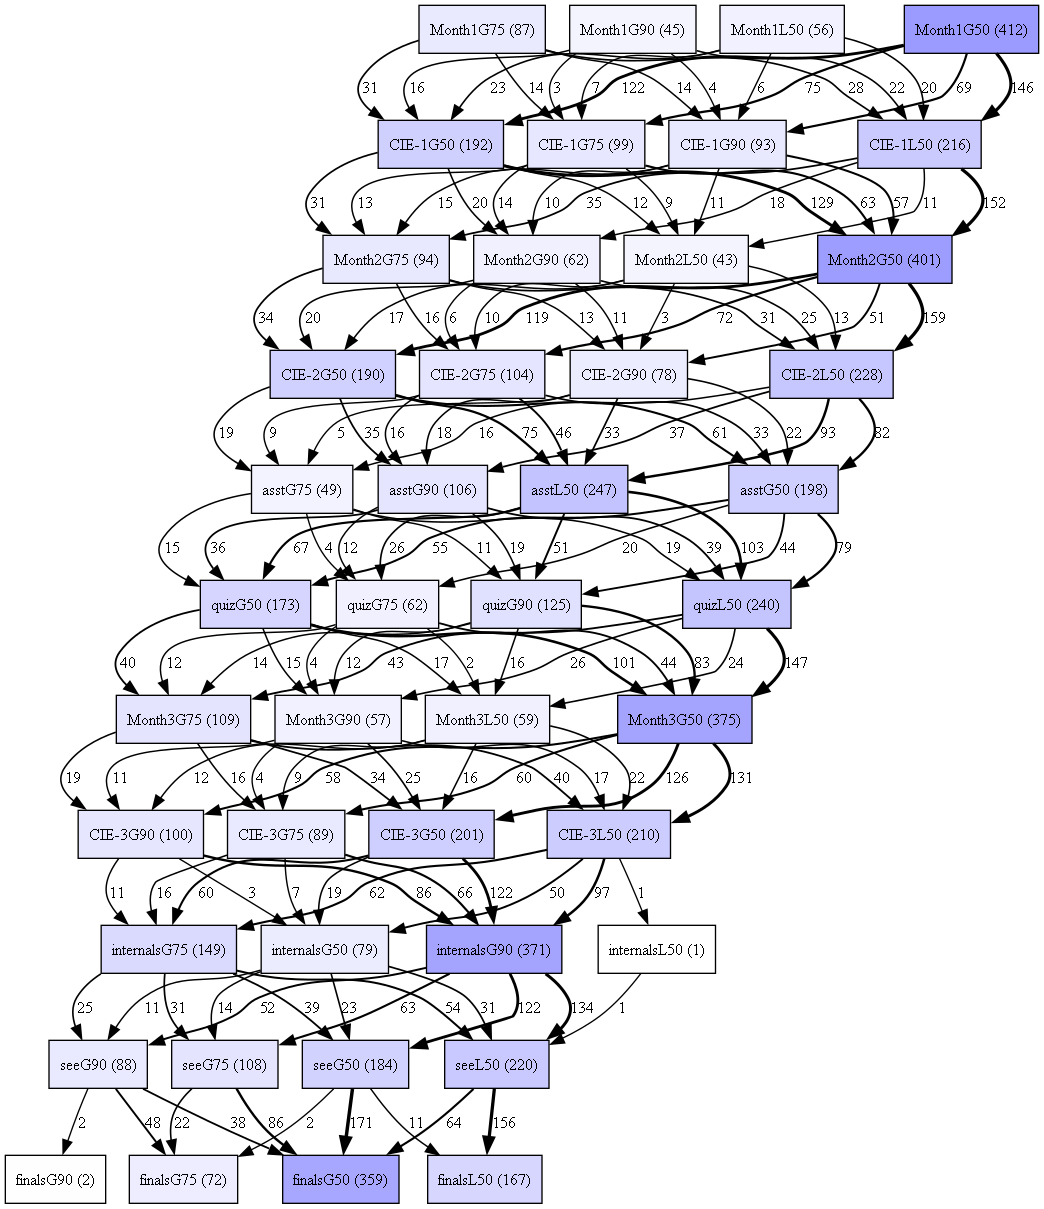

In [13]:
## Import the dfg_discovery algorithm
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
## Import the dfg visualization object
from pm4py.visualization.dfg import visualizer as dfg_visualization
#Create graph from log
dfg = dfg_discovery.apply(log)
# Visualise
gviz = dfg_visualization.apply(dfg, log=eventlog, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

In [14]:
pm4py.write_xes(log, 'exportedPN.xes')

C:\Users\sssna\AppData\Local\Programs\Python\Python310\lib\site-packages\pm4py\utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


exporting log, completed traces ::   0%|          | 0/600 [00:00<?, ?it/s]